## Spam email classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df=df.drop(['Unnamed: 0','label'],axis=1)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df['label_num'].value_counts()

,count
label_num,
0,3672
1,1499


###Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [6]:
df.shape

(5171, 2)

In [7]:
df.rename(columns={'label':'target',},inplace=True)
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [8]:
df.duplicated().sum()

np.int64(178)

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

##EDA

In [10]:
df.rename(columns={'label_num':'target'},inplace=True)

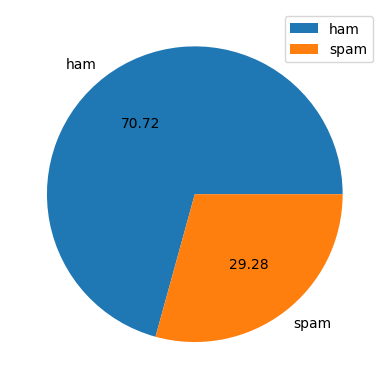

In [11]:
df['target'].value_counts()
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.legend()
plt.show()

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import SnowballStemmer,WordNetLemmatizer

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df['words']=df['text'].apply(len)

In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
df['sent']=df['text'].apply(lambda x:len(sent_tokenize(x)))

In [16]:
df

,text,target,words,sent
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,3
...,...,...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0,869,9
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,7
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,13
5169,Subject: industrial worksheets for august 2000...,0,573,20


In [17]:
df[df.target==0].describe()

,target,words,sent
count,3531.0,3531.000000,3531.000000
mean,0.0,994.939394,11.662419
std,0.0,1402.785831,25.330035
min,0.0,18.000000,1.000000
25%,0.0,241.000000,4.000000
50%,0.0,538.000000,7.000000
75%,0.0,1253.500000,13.500000
max,0.0,32258.000000,1204.000000


In [18]:
df[df.target==1].describe()

,target,words,sent
count,1462.0,1462.000000,1462.000000
mean,1.0,1249.326265,17.551984
std,0.0,1840.112883,33.111447
min,1.0,11.000000,1.000000
25%,1.0,304.250000,4.000000
50%,1.0,589.000000,9.000000
75%,1.0,1305.000000,19.000000
max,1.0,22073.000000,693.000000


<Axes: >

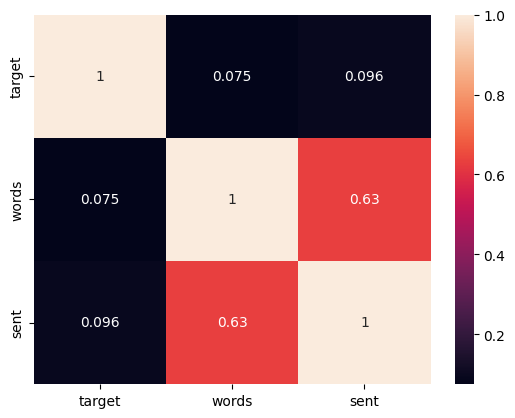

In [19]:
sns.heatmap(df[['target','words','sent']].corr(),annot=True)

##Data pre-processing

In [20]:
stemmer=SnowballStemmer('english')

In [21]:
def process(text):
  text=text.lower()
  text=word_tokenize(text)
  text=[word for word in text if word.isalnum()]
  text=[word for word in text if word not in stopwords.words('english')]
  for i in range(len(text)):
    text[i]=stemmer.stem(text[i])
  return ' '.join(text)

In [22]:
df['preprocessed']=df['text'].apply(lambda x:process(x))
df

,text,target,words,sent,preprocessed
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,3,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0,869,9,subject fw crosstex energi driscol ranch 1 3 m...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,7,subject put 10 ft transport volum decreas 2500...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,13,subject 3 4 2000 follow nom hpl take extra 15 ...
5169,Subject: industrial worksheets for august 2000...,0,573,20,subject industri worksheet august 2000 activ a...


##Model Building

In [23]:
X=df['preprocessed']
y=df['target']

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# ✅ Sparse-compatible models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Ridge Classifier", RidgeClassifier()),
    ("SGD Classifier", SGDClassifier()),

    ("KNearest Neighbour", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),

    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier()),

    ("Support Vector Classifier", SVC(probability=True)),

    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0))
]

# ❗ Dense-only models (handled separately)
models_dense = [
    ("Gaussian NB", GaussianNB()),
    ("Multinomial NB", MultinomialNB()),
]


In [26]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix
)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)
bow=CountVectorizer()
ti=TfidfVectorizer()
X_train_ti=ti.fit_transform(X_train)
X_test_ti=ti.transform(X_test)
X_train_bow=bow.fit_transform(X_train)
X_test_bow=bow.transform(X_test)


In [28]:
def class_model_train(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)

    # ---------- Test ----------
    y_pred_test = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)

    print(f"\n---------- {name} ----------")
    print("Accuracy :", acc_test)
    print("Precision:", prec_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    return acc_test, prec_test, name

In [29]:
from scipy.sparse import issparse

def class_model_train_dense(name, model, x_train, y_train, x_test, y_test):
    # Convert sparse matrix to dense only for specific models
    dense_only_models = ["Gaussian NB", "Multinomial NB", "Linear Discriminant Analysis"]

    if name in dense_only_models:
        if issparse(x_train):
            x_train = x_train.toarray()
        if issparse(x_test):
            x_test = x_test.toarray()

    model.fit(x_train, y_train)

    # ---------- Test ----------
    y_pred_test = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test, average='weighted')  # safer for multiclass

    print(f"\n---------- {name} ----------")
    print("Accuracy :", acc_test)
    print("Precision:", prec_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    return acc_test, prec_test, name


In [30]:
results_bow = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision'])
for name, model in models:
    acc_test, prec_test, name = class_model_train(name, model, X_train_bow, y_train, X_test_bow, y_test)
    results_bow.loc[len(results_bow)] = [name, acc_test, prec_test]


---------- Logistic Regression ----------
Accuracy : 0.9769769769769769
Precision: 0.9451612903225807
Confusion Matrix:
 [[683  17]
 [  6 293]]

---------- Ridge Classifier ----------
Accuracy : 0.8758758758758759
Precision: 0.8048780487804879
Confusion Matrix:
 [[644  56]
 [ 68 231]]

---------- SGD Classifier ----------
Accuracy : 0.974974974974975
Precision: 0.9536423841059603
Confusion Matrix:
 [[686  14]
 [ 11 288]]

---------- KNearest Neighbour ----------
Accuracy : 0.8578578578578578
Precision: 0.6838407494145199
Confusion Matrix:
 [[565 135]
 [  7 292]]

---------- Decision Tree ----------
Accuracy : 0.934934934934935
Precision: 0.8874172185430463
Confusion Matrix:
 [[666  34]
 [ 31 268]]

---------- Random Forest ----------
Accuracy : 0.975975975975976
Precision: 0.9508196721311475
Confusion Matrix:
 [[685  15]
 [  9 290]]

---------- Extra Trees ----------
Accuracy : 0.9819819819819819
Precision: 0.9636963696369637
Confusion Matrix:
 [[689  11]
 [  7 292]]

---------- Gradi

In [31]:
for name, model in models_dense:
    acc_test, prec_test, name = class_model_train_dense(name, model, X_train_bow, y_train, X_test_bow, y_test)
    results_bow.loc[len(results_bow)] = [name, acc_test, prec_test]


---------- Gaussian NB ----------
Accuracy : 0.9529529529529529
Precision: 0.952780034340318
Confusion Matrix:
 [[679  21]
 [ 26 273]]

---------- Multinomial NB ----------
Accuracy : 0.9769769769769769
Precision: 0.976957162813418
Confusion Matrix:
 [[689  11]
 [ 12 287]]


In [35]:
results_ti = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision'])
for name, model in models:
    acc_test, prec_test, name = class_model_train(name, model, X_train_ti, y_train, X_test_ti, y_test)
    results_ti.loc[len(results_ti)] = [name, acc_test, prec_test]
for name, model in models_dense:
    acc_test, prec_test, name = class_model_train_dense(name, model, X_train_ti, y_train, X_test_ti, y_test)
    results_ti.loc[len(results_ti)] = [name, acc_test, prec_test]


---------- Logistic Regression ----------
Accuracy : 0.986986986986987
Precision: 0.9735099337748344
Confusion Matrix:
 [[692   8]
 [  5 294]]

---------- Ridge Classifier ----------
Accuracy : 0.98998998998999
Precision: 0.9800664451827242
Confusion Matrix:
 [[694   6]
 [  4 295]]

---------- SGD Classifier ----------
Accuracy : 0.98998998998999
Precision: 0.976897689768977
Confusion Matrix:
 [[693   7]
 [  3 296]]

---------- KNearest Neighbour ----------
Accuracy : 0.9629629629629629
Precision: 0.9851851851851852
Confusion Matrix:
 [[696   4]
 [ 33 266]]

---------- Decision Tree ----------
Accuracy : 0.9419419419419419
Precision: 0.877742946708464
Confusion Matrix:
 [[661  39]
 [ 19 280]]

---------- Random Forest ----------
Accuracy : 0.9769769769769769
Precision: 0.9509803921568627
Confusion Matrix:
 [[685  15]
 [  8 291]]

---------- Extra Trees ----------
Accuracy : 0.9719719719719719
Precision: 0.9442622950819672
Confusion Matrix:
 [[683  17]
 [ 11 288]]

---------- Gradient 

In [41]:
results_ti=results_ti.sort_values(by='Precision',ascending=False)
results_ti.rename(columns={'Model':'Model_ti',},inplace=True)
results_bow=results_bow.sort_values(by='Precision',ascending=False)
results_bow.rename(columns={'Model':'Model_bow',},inplace=True)

In [42]:
results_bow

,Model_bow,Accuracy,Precision
13,Multinomial NB,0.976977,0.976957
6,Extra Trees,0.981982,0.963696
2,SGD Classifier,0.974975,0.953642
12,Gaussian NB,0.952953,0.952780
5,Random Forest,0.975976,0.950820
0,Logistic Regression,0.976977,0.945161
11,XGBoost,0.971972,0.935691
10,Support Vector Classifier,0.967968,0.915888
9,Bagging,0.947948,0.904918
7,Gradient Boosting,0.953954,0.894081


In [43]:
results_ti

,Model_ti,Accuracy,Precision
3,KNearest Neighbour,0.962963,0.985185
1,Ridge Classifier,0.989990,0.980066
10,Support Vector Classifier,0.991992,0.977049
2,SGD Classifier,0.989990,0.976898
0,Logistic Regression,0.986987,0.973510
5,Random Forest,0.976977,0.950980
6,Extra Trees,0.971972,0.944262
12,Gaussian NB,0.940941,0.942007
11,XGBoost,0.967968,0.932039
13,Multinomial NB,0.915916,0.924250


In [44]:
model=RidgeClassifier()

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
params={'alpha':[0.01,0.1,1,10,100],}

In [47]:
grid=GridSearchCV(model,params,cv=5)

In [48]:
grid.fit(X_train_ti,y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [50]:
grid.best_estimator_


RidgeClassifier(alpha=1)

In [51]:
grid.best_params_

{'alpha': 1}

In [52]:
spam_email_classifier=RidgeClassifier(alpha=1)
spam_email_classifier.fit(X_train_ti,y_train)
y_pred=spam_email_classifier.predict(X_test_ti)
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
print(acc,prec)

0.98998998998999 0.9800664451827242


In [ ]:
import pickle
pickle.dump(spam_email_classifier,open('spam_email_classifier.pkl','wb'))
pickle.dump(ti,open('transform.pkl','wb'))
pickle.dump(stemmer,open('stemmer.pkl','wb'))